--- Step 1: Built-in Data Loaded Successfully ---
Categories: ['rec.sport.baseball', 'sci.space']
Number of documents loaded: 1981


--- Step 2 & 3: Data Split Complete ---
Training set size: 1485
Testing set size: 496

--- Step 4: Model Training Complete ---

--- Step 5: Model Evaluation ---
Model Accuracy: 0.9355

Classification Report:
                    precision    recall  f1-score   support

rec.sport.baseball       0.89      0.98      0.93       232
         sci.space       0.98      0.90      0.94       264

          accuracy                           0.94       496
         macro avg       0.94      0.94      0.94       496
      weighted avg       0.94      0.94      0.94       496


Confusion matrix saved as 'newsgroups_confusion_matrix.png'

--- Analysis Complete ---


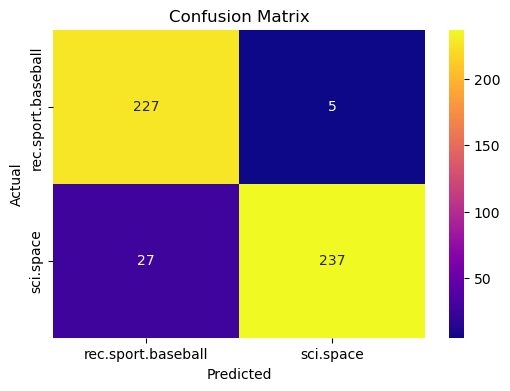

In [4]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # --- Step 1: Load the Built-in Data ---
    # No download needed! This data comes with scikit-learn.
    # We select two categories to make it a binary classification problem.
    categories = ['rec.sport.baseball', 'sci.space']
    newsgroups_data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
    
    print("--- Step 1: Built-in Data Loaded Successfully ---")
    # The target names (0 and 1) correspond to the categories list
    print("Categories:", newsgroups_data.target_names)
    print("Number of documents loaded:", len(newsgroups_data.data))
    print("\n")


    # --- Step 2 & 3: Split Data and Prepare for Feature Extraction ---
    # The dataset is already separated into data (text) and target (labels)
    X = newsgroups_data.data
    y = newsgroups_data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    print("--- Step 2 & 3: Data Split Complete ---")
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}\n")


    # --- Step 4: Train the Model using a Pipeline ---
    # This pipeline is identical to the one used for sentiment analysis.
    text_clf = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('clf', LinearSVC(max_iter=2000)),
    ])

    # Train the pipeline on the training data
    text_clf.fit(X_train, y_train)
    print("--- Step 4: Model Training Complete ---\n")


    # --- Step 5: Evaluate the Model ---
    predictions = text_clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    print("--- Step 5: Model Evaluation ---")
    print(f"Model Accuracy: {accuracy:.4f}")
    
    print("\nClassification Report:")
    # Use the target_names from the dataset for clear labels
    print(classification_report(y_test, predictions, target_names=newsgroups_data.target_names))

    # Generate and save the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', 
                xticklabels=newsgroups_data.target_names, 
                yticklabels=newsgroups_data.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig('newsgroups_confusion_matrix.png')
    print("\nConfusion matrix saved as 'newsgroups_confusion_matrix.png'")
    print("\n--- Analysis Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")